# Simple Linear regression
In this notebook, we will build a linear regression model to predict 'Sales' using an appropriate predictor variables.
1. Reading and Understanding the data
2. training the model
3. Residual analysis
4. Predicting and evaluating on the test set

### **Step 1: Reading and Understanding the data**
##### Lets start with the following steps
##### 1. importing the data using pandas library
##### 2. understanding the structure of the data
 

In [56]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
# read the dataset 
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [58]:
advertising.shape

(200, 4)

In [59]:
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [60]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

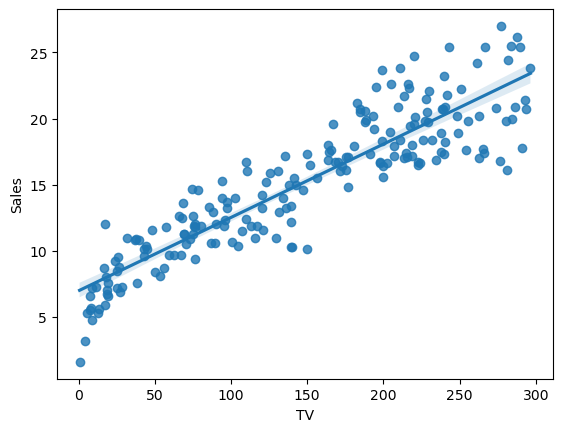

In [61]:
#Visualise the data/dataset
sns.regplot(x='TV', y='Sales', data=advertising)

<Axes: xlabel='Radio', ylabel='Sales'>

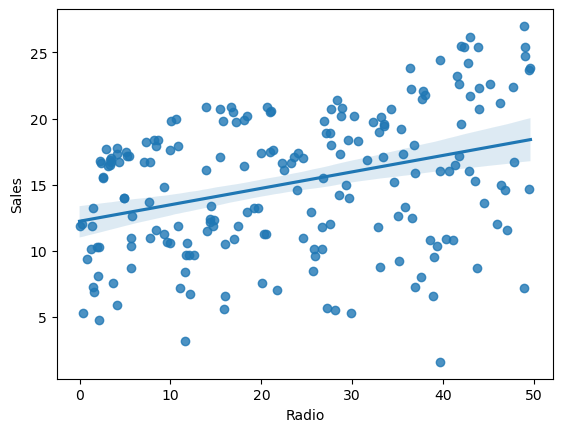

In [62]:
sns.regplot(x='Radio', y='Sales', data=advertising)

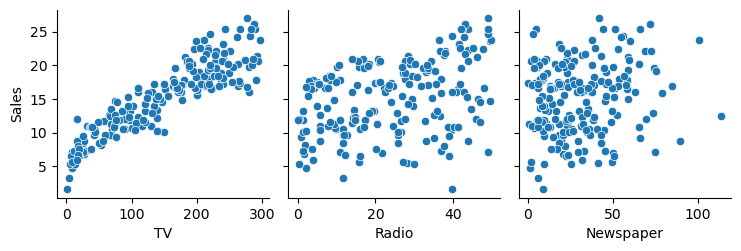

In [63]:
sns.pairplot(x_vars=['TV','Radio','Newspaper'], y_vars='Sales', data=advertising)

In [64]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

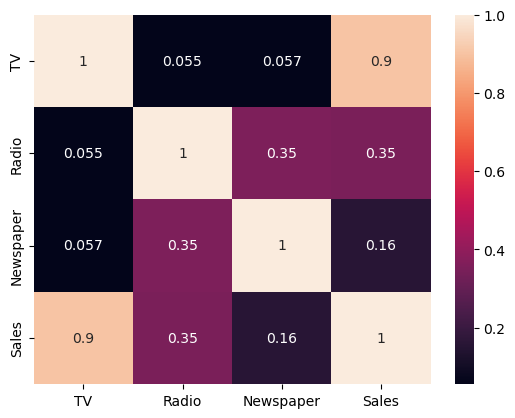

In [65]:
sns.heatmap(advertising.corr(), annot=True)

# **Step 2: Performing Simple Linear Regression**
#### Equation of linear regression
###### *y = c+m1x1+m2x2+...mnxn*
###### y is the response
###### c is the intercept 
###### m1 is the coefficient for the first feature
###### mn is the coefficient for the nth feature

#### in our case:
#### *y = c+m1+TV*

#### The m values are called the module coefficient or model parameters

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


## Steps:
- Create x and y
- Create train and test sets (70-30, 80-20)
- Train your model on the training set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)



In [67]:
# create x and y
X = advertising['TV']
y = advertising['Sales']


In [68]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state=100)

In [69]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [70]:
#training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [71]:
#Fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [72]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.52e-52
Time:                        12:17:03   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# 1. coef and p-value
# 2. R-squared is 81.6%, very high which is good
# 3. p(F-statistic) is low => the fit in not by chance

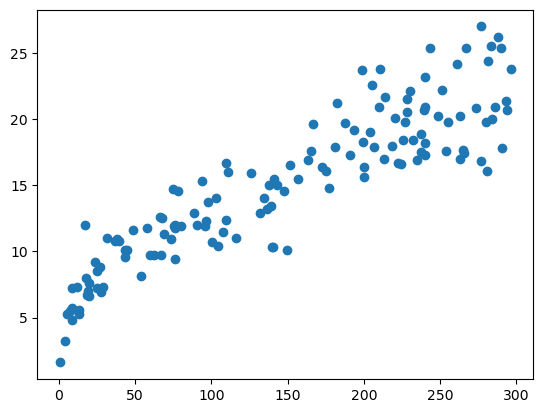

In [74]:
plt.scatter(X_train, y_train)


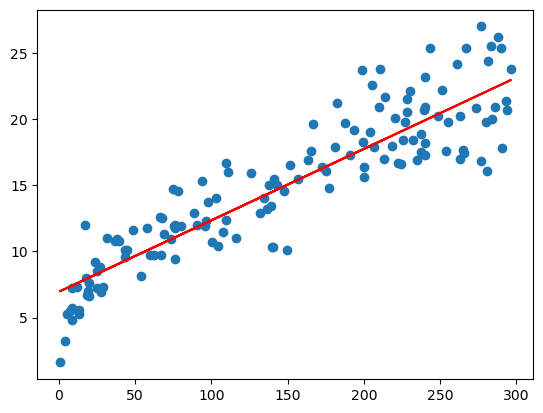

In [75]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 +  0.054*X_train, 'r')

In [76]:
y_train_pred = lr_model.predict(X_train_sm)

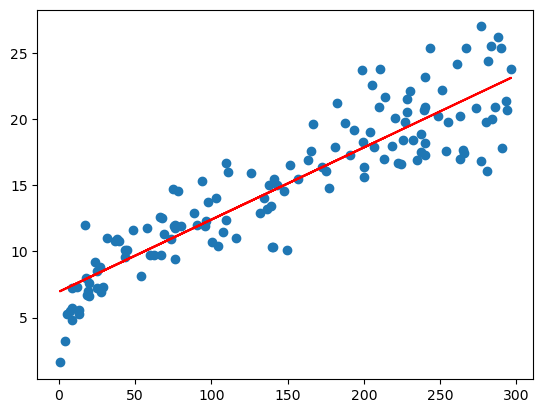

In [77]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred,'r')

## **Step 3: Resdiual Analysis**

In [78]:
res = y_train - y_train_pred

C:\Users\AVSF3W744\AppData\Local\Temp\ipykernel_19572\3375243580.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'Residual Plot')

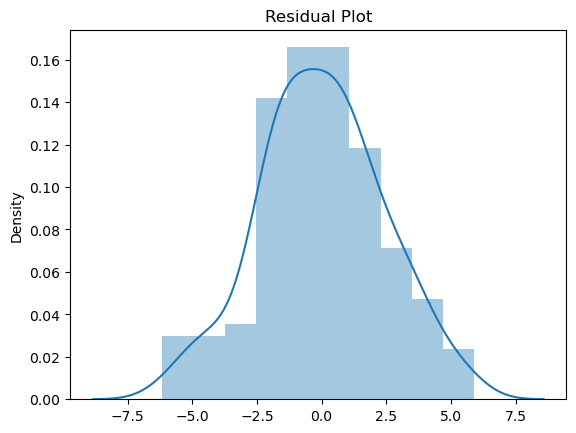

In [79]:
# Plot the Residual
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

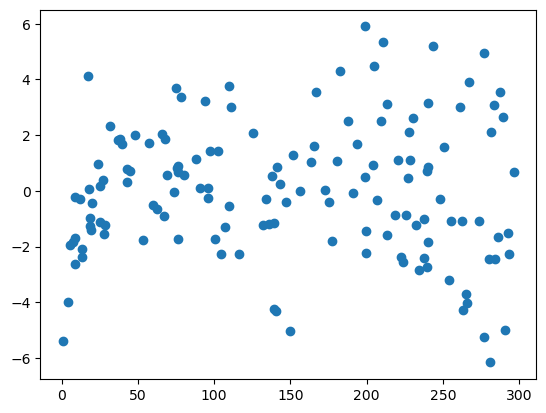

In [80]:
# look for the patterns in residuals (we should not be able to identify)
plt.scatter(X_train, res)
plt.show()

# **Step 4: Predictions and Evalution on the Test set**

In [81]:
# Make prediction on the test set (y_test_pred)
#evaluate the model, r-squared on the test

In [83]:
# add cons/intercept to test
X_test_sm = sm.add_constant(X_test)
# Pred on test
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [88]:
# evaluate the model, r-squared, on the test
#r-squared
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245659

In [89]:
# r2 on train
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480389

In [91]:
# mean squared error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826953

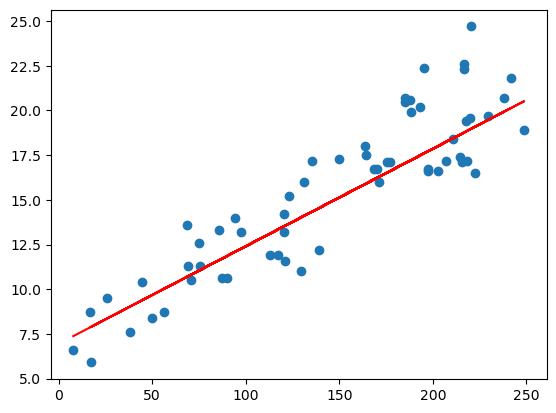

In [93]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred,'r')
plt.show()

# **Linear Regression using `sklearn`**

In [94]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state=100)

In [102]:
#reshape to X_train to (140, 1)
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)


In [108]:
# Steps in sklearn model building
# 1. create a object of linear regression
lm = LinearRegression()

# 2. fit the model 
lm.fit(X_train_lm, y_train)

LinearRegression()

In [110]:
# 3. see the params, make predictions (train, test)
print(lm.coef_)
print(lm.intercept_)
# 4. evaluate (r2, etc.)

[0.05454575]
6.948683200001357


In [111]:
#make predictions 
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [112]:
#. evaluate the model
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
